# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import random

pima_df=pd.read_csv('pima-indians-diabetes.csv')




It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [13]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [14]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [15]:
pima_df.loc[pima_df.Plas == 0, 'Plas'] = pima_df.Plas.median()
pima_df.loc[pima_df.Pres == 0, 'Pres'] = pima_df.Pres.median()
pima_df.loc[pima_df.skin == 0, 'skin'] = pima_df.skin.median()
pima_df.loc[pima_df.test == 0, 'test'] = pima_df.test.median()
pima_df.loc[pima_df.mass == 0, 'mass'] = pima_df.mass.median()

# 5. Print the descriptive statistics of each & every column using describe() function

In [16]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

In [22]:
pima_df.groupby("class").agg({'class': 'count'})


AttributeError: module 'seaborn' has no attribute 'hist'

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

In [ ]:
import seaborn as sns
sns.pairplot(pima_df, hue="class", palette="husl")
pima_df.corr()

Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test =train_test_split(pima_df.drop('class',axis=1),pima_df['class'],test_size=0.3,random_state=1)


88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: class, Length: 537, dtype: int64

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [50]:


from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 10. Print the accuracy of the model & print the confusion matrix

           Imp
Preg  0.054803
Plas  0.405606
Pres  0.029713
skin  0.016249
test  0.000000
mass  0.221791
pedi  0.085893
age   0.185946
[[120  26]
 [ 23  62]]


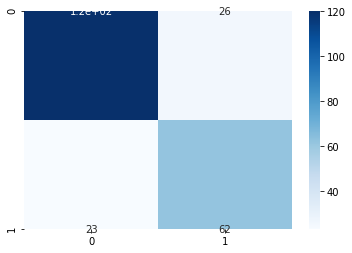

In [72]:
dt_model.score(X_test,y_test)

test_pred = dt_model.predict(X_test)

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_test.columns))#Print the feature importance of the decision model

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,test_pred)
print(cm)
sns.heatmap(cm,annot=True, 
             cmap='Blues')

# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5} ,max_depth=5,min_samples_leaf=5,random_state=1)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.7792207792207793

# 12. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [89]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl.fit(X_train,y_train)
abcl.score(X_test,y_test)

0.7748917748917749

# 13. Apply Bagging Classifier Algorithm and print the accuracy.

In [87]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)

bgcl.fit(X_train,y_train)
bgcl.score(X_test,y_test)

0.7748917748917749

# 14. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl.fit(X_train,y_train)
gbcl.score(X_test,y_test)

0.7748917748917749